In [ ]:
from genetic_algorithm import algorithms, selectors, individuals, crossover
from deap import base, creator, tools
import numpy as np
import random

# Definir los parámetros del problema
IND_SIZE = 12  # Número de genes en cada individuo

# Crear los tipos de fitness e individuo en DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", individuals.truss_like, fitness=creator.FitnessMax)

# Configuración del entorno evolutivo utilizando DEAP
toolbox = base.Toolbox()

# Registro de las funciones
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", lambda: creator.Individual(np.array([[random.choice([0, 1]) for _ in range(IND_SIZE)] for _ in range(2)]),
                                                          var = 0.5))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", lambda ind: ind.evaluate())
toolbox.register("clone", lambda ind: ind.clone())
toolbox.register("mutate", lambda ind: ind.mutate())
toolbox.register("mate", crossover.mix_crossover)
toolbox.register("select", selectors.select_individuals_elitist)

n_pop = 50
pop = toolbox.population(n=n_pop)

hall_of_fame = tools.HallOfFame(1)

# Definir estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# _lambda controla la variación en la probabilidad de mutación
population, logbook = algorithms.ea(pop, toolbox, 100, halloffame= hall_of_fame, stats= stats, _lambda = 1)

pm:100.0: 100%|██████████| 100/100 [04:04<00:00,  2.44s/it]


Estructura formada por aluminio (azul) y tungsteno (rojo)

Las barras son de 4 y 8 mm de diámetro

In [2]:
gen, avg, std = logbook.select("gen", "avg","std")
print(f'el promedio es  {avg[-1]}')
print(f'el desviación estándar es  {std[-1]}')

el promedio es  0.3884720191828916
el desviación estándar es  0.258728259682488


bandgap:11.863 kHz


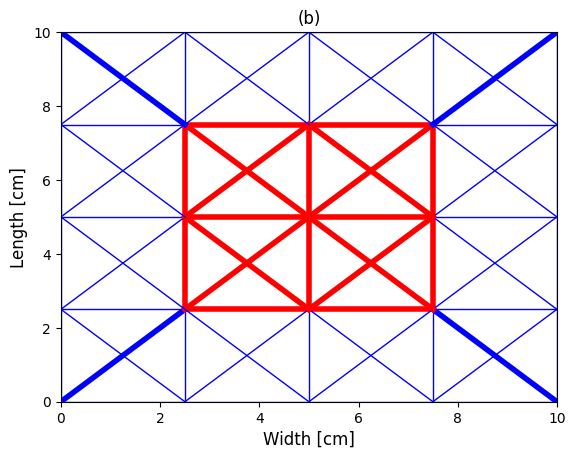

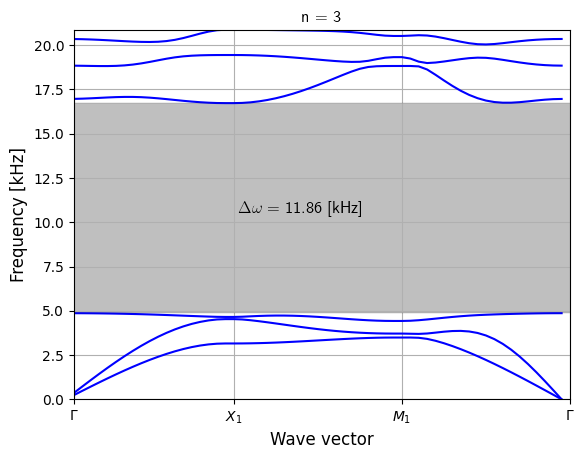

In [3]:
best_individual = hall_of_fame[0]
print(f'bandgap:{best_individual.bandgap:.3f} kHz')
best_individual.plot()


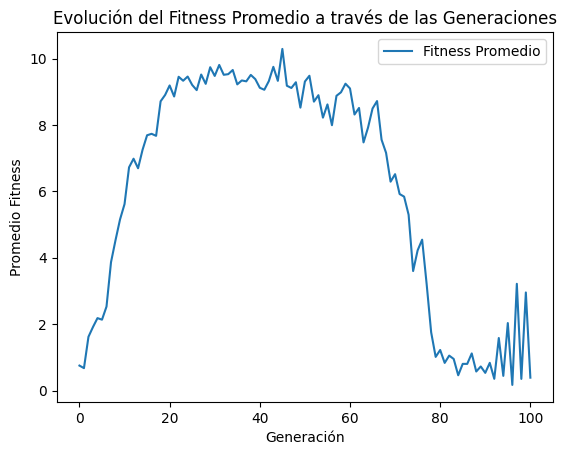

In [4]:
import matplotlib.pyplot as plt

# Supongamos que gen y avg son listas o arrays con los datos de generaciones y promedios
gen, avg, max = logbook.select("gen", "avg", "max")

# Crea la gráfica
plt.plot(gen, avg, label="Fitness Promedio")
plt.xlabel("Generación")
plt.ylabel("Promedio Fitness")
plt.title("Evolución del Fitness Promedio a través de las Generaciones")

# Muestra la leyenda y la gráfica
plt.legend()
plt.show()


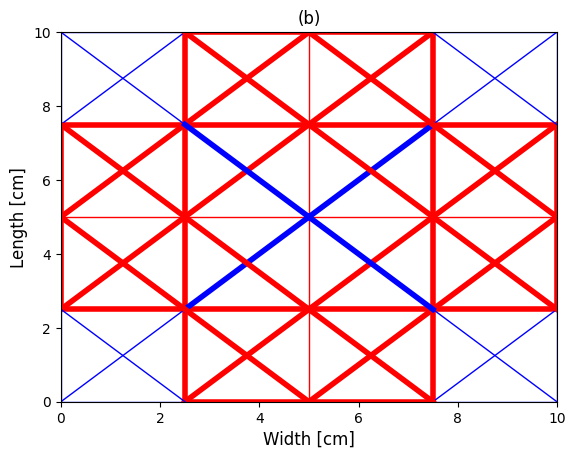

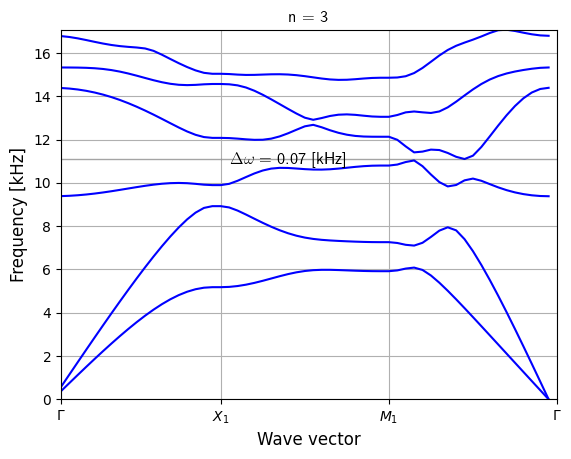

In [5]:
gens_list = [individuo.gens for individuo in population]
avg_gens = np.mean(np.array(gens_list), axis=0)
avg_gens = np.where(avg_gens >= 0.5, 1, 0)
truss = individuals.truss_like(avg_gens, var= 0.5)
truss.evaluate()
truss.plot()

In [6]:
print(logbook)

gen	nevals	pm  	avg     	std     	min     	max     
0  	25    	    	0.752286	0.661249	0.01    	2.07756 
1  	50    	5   	0.675617	0.81723 	0.01    	2.62402 
2  	50    	5.1 	1.62004 	0.878832	0.01    	2.7781  
3  	50    	3.7 	1.91436 	1.06301 	0.112978	3.91025 
4  	50    	3.5 	2.18223 	0.80258 	0.123883	3.40825 
5  	50    	3.4 	2.13568 	0.939981	0.894191	3.63128 
6  	50    	3.4 	2.52984 	1.04956 	0.78041 	4.4183  
7  	50    	3.3 	3.86665 	1.34369 	1.71947 	6.07566 
8  	50    	2.8 	4.53093 	1.23644 	1.11913 	6.02783 
9  	50    	2.7 	5.15515 	1.14294 	1.4139  	7.2664  
10 	50    	2.6 	5.6174  	1.07813 	2.4699  	7.55046 
11 	50    	2.6 	6.72467 	1.24154 	4.69224 	8.73956 
12 	50    	2.4 	6.98439 	1.3902  	4.086   	9.31518 
13 	50    	2.4 	6.69646 	1.0447  	4.29869 	8.90721 
14 	50    	2.4 	7.25544 	0.86868 	4.81241 	9.13323 
15 	50    	2.4 	7.6903  	1.18975 	5.96046 	10.2    
16 	50    	2.4 	7.73451 	1.65147 	5.12634 	10.3973 
17 	50    	2.4 	7.67295 	1.68075 	3.54024 	10.4335 
18 	50    	2